<a href="https://colab.research.google.com/github/Shubham07102003/Celebal-summer-internship-2025/blob/main/WEEK-3/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

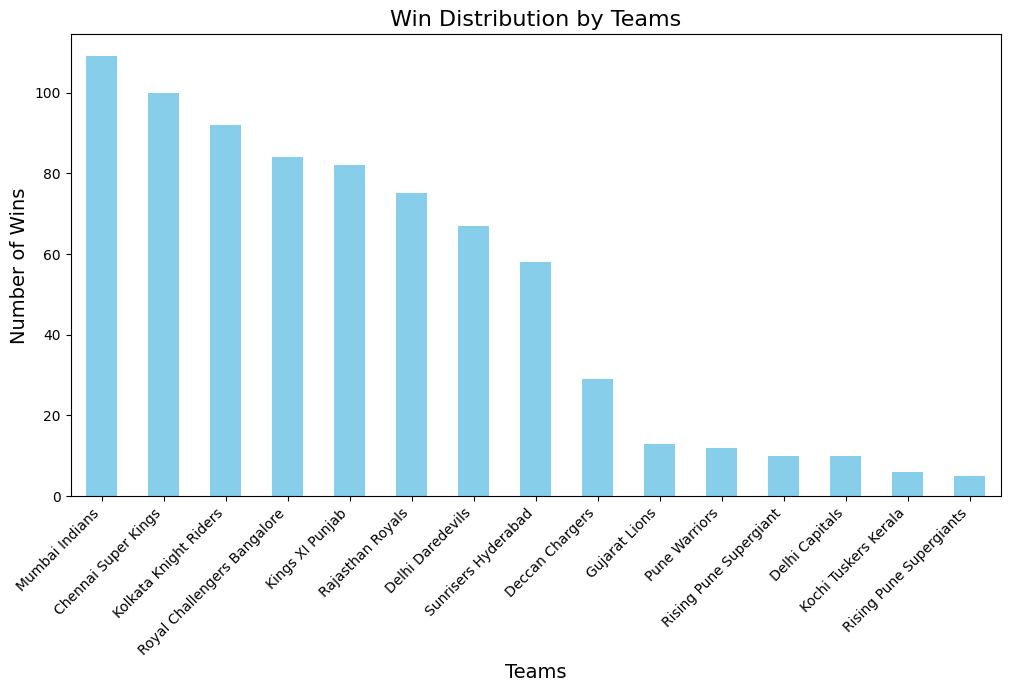

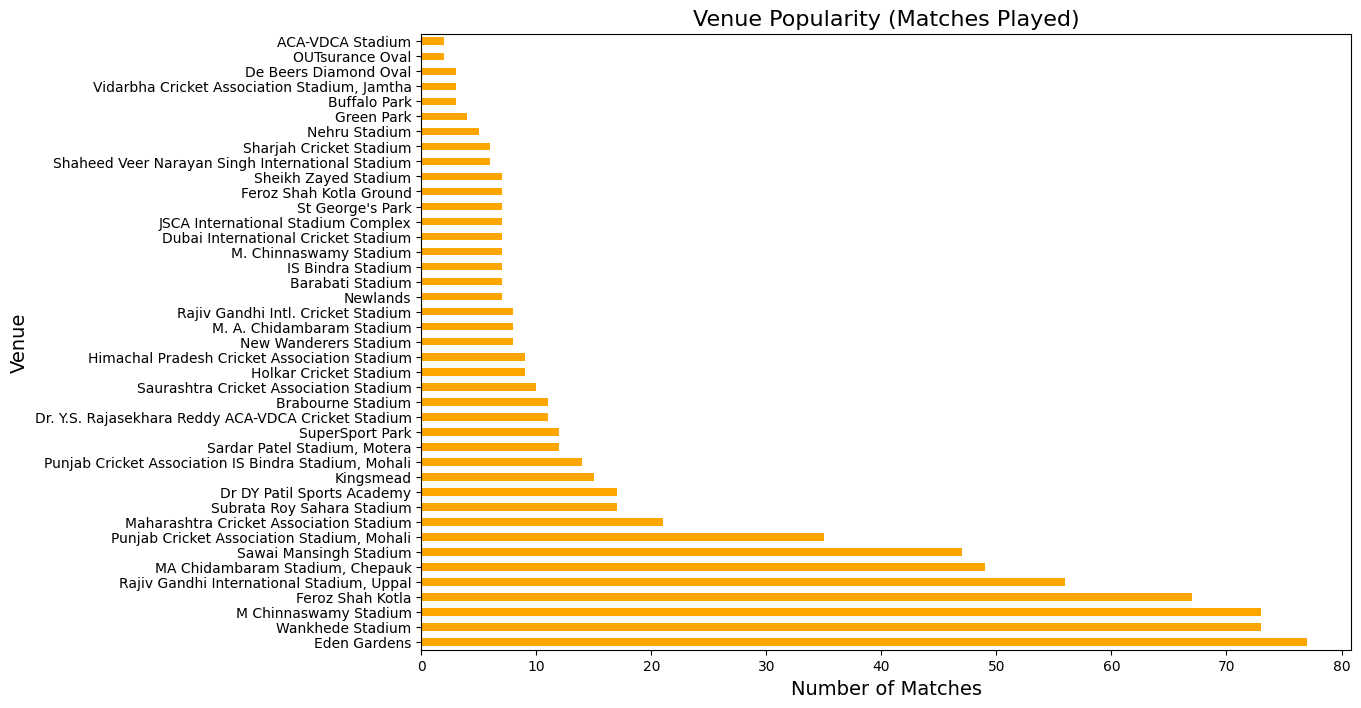

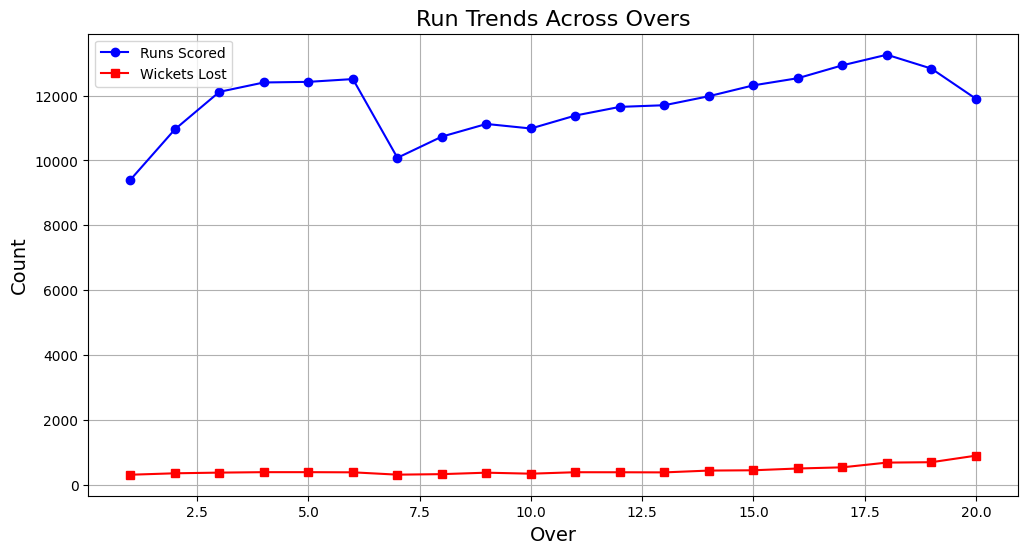

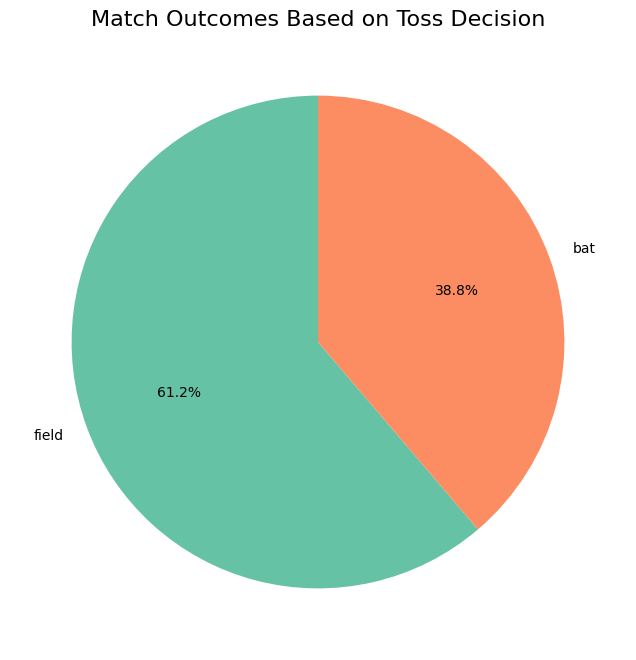

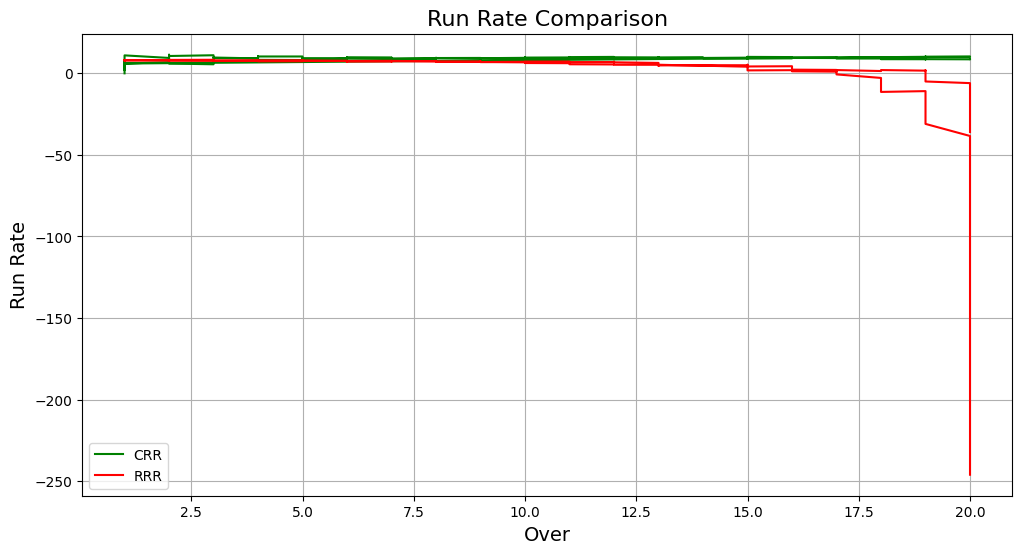

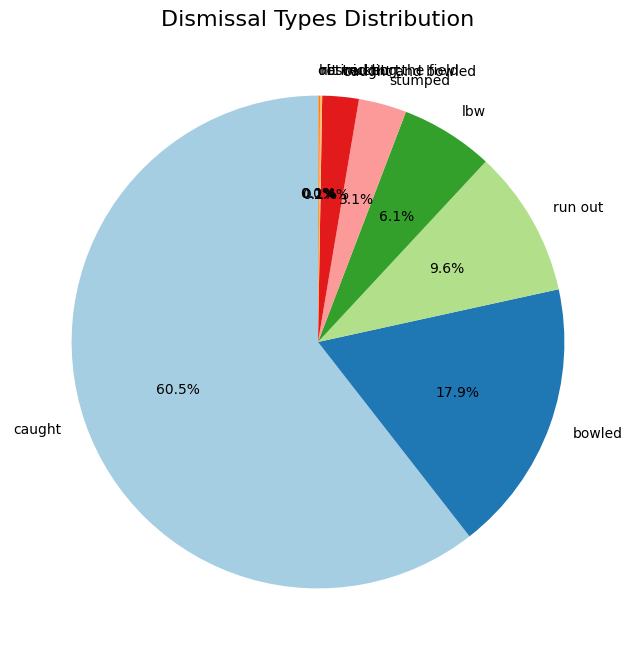

In [4]:
# Name: Shubham
# Student Id: CT_CSI_DS_4356

'''Take Any dataset of your choice and do the visualization'''
'''Perfromiong visualisation on IPL Dataset'''

# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
matches_data = pd.read_csv("matches.csv")
deliveries_data = pd.read_csv("deliveries.csv")

# --- Visualization 1: Win Distribution by Teams ---
plt.figure(figsize=(12, 6))
team_wins = matches_data['winner'].value_counts()
team_wins.plot(kind='bar', color='skyblue')
plt.title('Win Distribution by Teams', fontsize=16)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# --- Visualization 2: Venue Popularity ---
plt.figure(figsize=(12, 8))
venue_counts = matches_data['venue'].value_counts()
venue_counts.plot(kind='barh', color='orange')
plt.title('Venue Popularity (Matches Played)', fontsize=16)
plt.xlabel('Number of Matches', fontsize=14)
plt.ylabel('Venue', fontsize=14)
plt.show()

# --- Visualization 3: Run Trends Across Overs ---
over_data = deliveries_data.groupby('over').agg(
    runs=('total_runs', 'sum'),
    wickets=('player_dismissed', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(over_data['over'], over_data['runs'], marker='o', label='Runs Scored', color='blue')
plt.plot(over_data['over'], over_data['wickets'], marker='s', label='Wickets Lost', color='red')
plt.title('Run Trends Across Overs', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# --- Visualization 4: Match Outcomes Based on Toss Decision ---
plt.figure(figsize=(8, 8))
toss_outcomes = matches_data['toss_decision'].value_counts()
toss_outcomes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Match Outcomes Based on Toss Decision', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.show()

# --- Visualization 5: Run Rate Comparison (Single Match Example) ---
match_id = 1  # Example match ID
match_deliveries = deliveries_data[deliveries_data['match_id'] == match_id].copy()

match_deliveries['cumulative_runs'] = match_deliveries.groupby('inning')['total_runs'].cumsum()
match_deliveries['balls_bowled'] = (match_deliveries['over'] - 1) * 6 + match_deliveries['ball']
match_deliveries['crr'] = match_deliveries['cumulative_runs'] / (match_deliveries['balls_bowled'] / 6)

# Assuming a target of 160 runs
target = 160
match_deliveries['rrr'] = (target - match_deliveries['cumulative_runs']) / ((120 - match_deliveries['balls_bowled']) / 6)

plt.figure(figsize=(12, 6))
plt.plot(match_deliveries['over'], match_deliveries['crr'], label='CRR', color='green')
plt.plot(match_deliveries['over'], match_deliveries['rrr'], label='RRR', color='red')
plt.title('Run Rate Comparison', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Run Rate', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# --- Visualization 6: Dismissal Types ---
plt.figure(figsize=(8, 8))
dismissals = deliveries_data['dismissal_kind'].value_counts()
dismissals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Dismissal Types Distribution', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.show()
